<a href="https://colab.research.google.com/github/sheezarainbow9/Notebooks/blob/main/Aula06_Redes_Neurais_com_TensorFlow_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuctura

Sheeza

Professora: Camila Dantas

Redes Neurais com Tensor Flow

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True) #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived']. to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (535, 4)
Tamanho de X_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


In [ ]:
model = keras.models.Sequential() # Cria uma rede neural sequencial -- feed forward
model.add(keras.layers.Dense(4, activation='relu', input_shape=X_train[0].shape)) # primeira hidden
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer com ativação

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
batch_size = 32 # X_train 535/32 = 16.71 (então são 17 batches de 32)
epochs = 100

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 15ms/step - loss: 13.6512 - accuracy: 0.5738 - val_loss: 8.0640 - val_accuracy: 0.6034
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 11.9016 - accuracy: 0.5626 - val_loss: 7.2250 - val_accuracy: 0.6034
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 10.1679 - accuracy: 0.5607 - val_loss: 6.4853 - val_accuracy: 0.6034
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 10.1329 - accuracy: 0.5383 - val_loss: 5.7509 - val_accuracy: 0.6034
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 9.7878 - accuracy: 0.5364 - val_loss: 5.1689 - val_accuracy: 0.5978
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 8.6260 - accuracy: 0.5495 - val_loss: 4.6332 - val_accuracy: 0.6089
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 7.6792 - accuracy: 0.5290 - val_loss: 4.1775 - val_accuracy: 0.6034
Epoch 8/

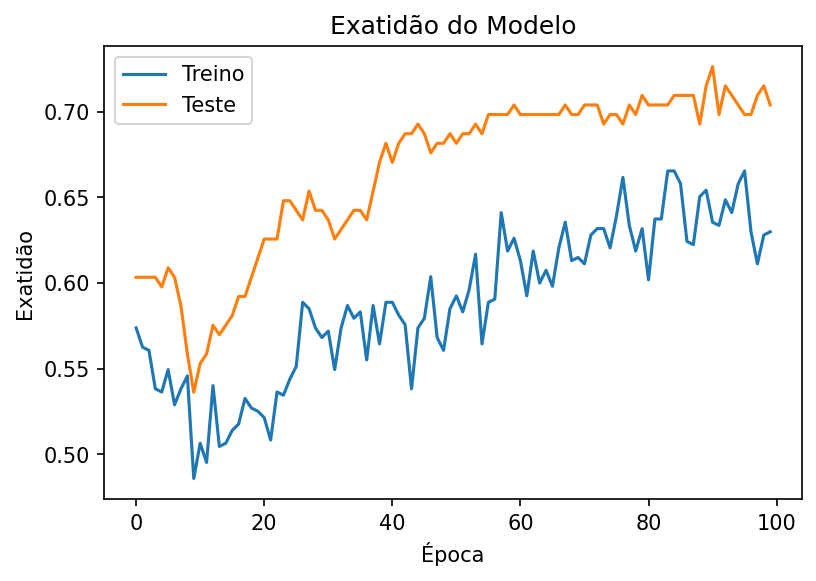

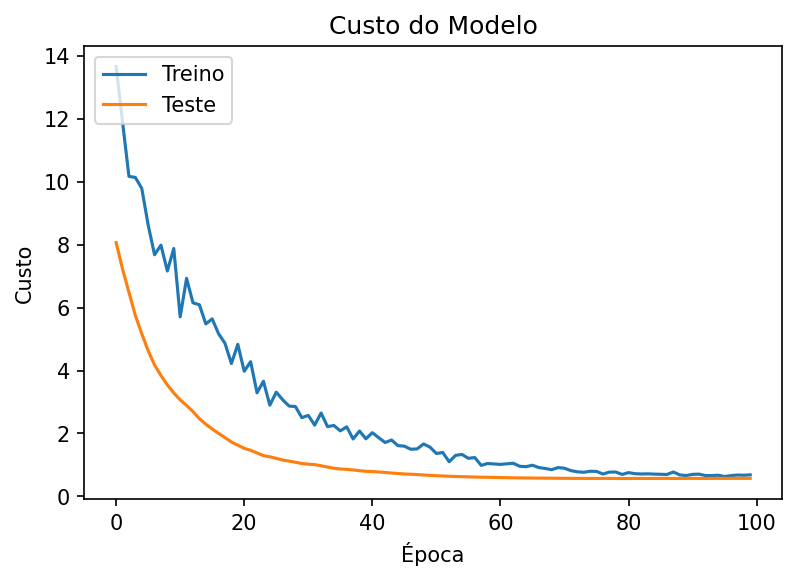

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

# Plot acurácia de treino e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

# Plot custo de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()


In [ ]:
model.evaluate(X_test, y_test)
# X_test 179/32 = 5.59 (então são 6 batches de 32)

6/6 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7039


[0.5750283598899841, 0.7039105892181396]

In [ ]:
(model.predict(X_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    